# 基础

In [16]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
#创建一个变量op
m1=tf.constant([[3,3]])  #一行两列
#创建一个 变量op
m2=tf.constant([[3],[3]])  #两行一列
#矩阵相乘
pro=tf.matmul(m1,m2)
print(pro)

Tensor("MatMul_2:0", shape=(1, 1), dtype=int32)


## 创建会话

In [17]:
#定义一个会话
sess=tf.compat.v1.Session()
result=sess.run(pro)
print(result)
sess.close()  #关闭会话

[[18]]


In [18]:
#定义会话另一种方法
with tf.compat.v1.Session() as sess:  #自动关闭会话
    result=sess.run(pro)
    print(result)

[[18]]


## 变量的使用

In [25]:
x=tf.Variable([1,2])
a=tf.constant([3,3])
#减法op
sub=tf.subtract(x,a)
#加法op
add=tf.add(x,a)
#初始化变量
init=tf.compat.v1.global_variables_initializer()
#创建会话
with tf.compat.v1.Session() as sess:
    sess.run(init)
    print(sess.run(sub))
    print(sess.run(add))

[-2 -1]
[4 5]


In [32]:
#创建一个变量初始化为0
state=tf.Variable(0,name="counter")
#加法
new_value=tf.add(state,1)
#赋值
updata=tf.compat.v1.assign(state,new_value)
#初始化变量
init=tf.compat.v1.global_variables_initializer()
#创建会话
with tf.compat.v1.Session() as sess:
    sess.run(init)
    print(sess.run(new_value))
    print(sess.run(updata))
    #定义循环
    for i in range(5):
        print(sess.run(updata))
        

1
1
2
3
4
5
6


## Fetch and Feed

In [35]:
'''Fetch'''
input1=tf.constant(3.0)
input2=tf.constant(2.0)
input3=tf.constant(1.0)
#加法op
add=tf.add(input1,input2)
#乘法op
mul=tf.multiply(input1,input2)
#初始化变量
init=tf.compat.v1.global_variables_initializer()
#创建会话
with tf.compat.v1.Session() as sess:
    sess.run(init)
    print(sess.run([add,mul]))  #同时运行俩个op


[5.0, 6.0]


In [38]:
'''Feed'''
#创建占位符op
input1=tf.compat.v1.placeholder(tf.float32)
input2=tf.compat.v1.placeholder(tf.float32)
output=tf.multiply(input1,input2)
#初始化变量
init=tf.compat.v1.global_variables_initializer()
#创建会话
with tf.compat.v1.Session() as sess:
    sess.run(init)
    #feed的数据以字典形式传入
    print(sess.run(output,feed_dict={input1:3,input2:3}))  #这里传入值

9.0


## 案例

loss= 3.6455853
0 [0.62098074, -1.9747584]
loss= 0.0051705968
20 [0.3404105, 0.065453]
loss= 0.00017061106
40 [0.14367129, 0.17556134]
loss= 5.62956e-06
60 [0.10793286, 0.19556074]
loss= 1.8575648e-07
80 [0.101441, 0.19919361]
loss= 6.1293575e-09
100 [0.100261755, 0.19985351]


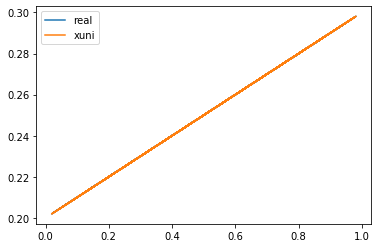

In [60]:
import tensorflow   as tf
import numpy as np
import matplotlib.pyplot as plt
#使用numpy生成100个随即点
x_data=np.random.rand(100)
y_data=x_data*0.1+0.2

#构造线性模型
b=tf.Variable(2.)  #浮点型
k=tf.Variable(3.)
y=k*x_data+b
'''operation'''
#创建二次代价函数
loss=tf.compat.v1.reduce_mean(tf.square(y_data-y))  #误差平方平均值
#定义一个梯度下降来进行优化
optimizer=tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.6,
                                                    use_locking=False, 
                                                    name="GradientDescent")
#最小化代价函数
train=optimizer.minimize(loss)
'''初始化变量'''
init=tf.compat.v1.global_variables_initializer()
'''创建会话'''
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for step in range(120):
        sess.run(train)
        if (step%20==0):
            print("loss=",sess.run(loss))
            print(step,sess.run([k,b]))

    func=sess.run(k)*x_data+sess.run(b)
'''可视化'''
plt.plot(x_data,y_data,label="real")
plt.plot(x_data,func,label="xuni")
plt.legend()